# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.243675e+01     1.422606e+01
 * time: 0.004303932189941406
     1     6.324858e+01     9.414624e+00
 * time: 0.012600898742675781
     2     5.594127e+01     1.402933e+01
 * time: 0.03186798095703125
     3     4.253568e+01     1.067552e+01
 * time: 0.0552220344543457
     4     3.434626e+01     9.524089e+00
 * time: 0.07825398445129395
     5     1.469624e+01     3.157618e+00
 * time: 0.10055804252624512
     6     1.154150e+01     3.158235e+00
 * time: 0.11654806137084961
     7     9.438315e+00     2.496424e+00
 * time: 0.19805502891540527
     8     8.886612e+00     3.284546e+00
 * time: 0.2147350311279297
     9     8.673989e+00     4.991568e+00
 * time: 0.2306690216064453
    10     7.609771e+00     2.880126e+00
 * time: 0.24785184860229492
    11     7.123387e+00     3.605484e+00
 * time: 0.26140689849853516
    12     6.563771e+00     2.620433e+00
 * time: 0.27531003952026367
    13     6.220728e+00     2.236797e+00
 * time: 

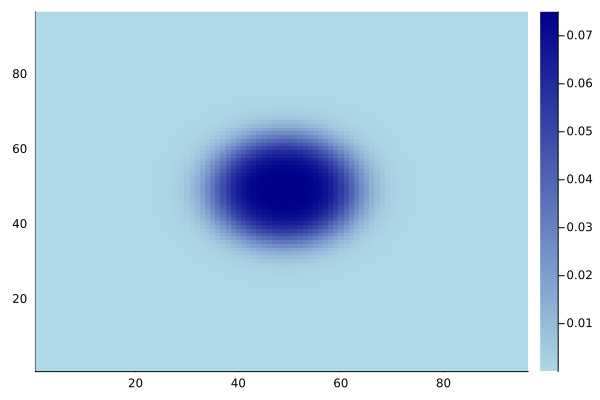

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)